<a href="https://colab.research.google.com/github/rupamanogna28/credit_card/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df=pd.read_csv('/content/fraudTrain.csv')
test_df=pd.read_csv('/content/fraudTest.csv')

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
train_df.shape

(1223491, 23)

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [ ]:
fraud_count=train_df['is_fraud'].value_counts()
print(fraud_count)

#There are 1289169 non fraud transactions whereas only 7506 fraud transactions

is_fraud
0.0    1216390
1.0       7100
Name: count, dtype: int64


In [ ]:
merch_count=train_df['merchant'].nunique()
print(merch_count)

#There are 693 unique merchants

693


In [ ]:
cat_count=train_df['category'].nunique()
print(cat_count)

#Only 14 unique categories

14


category        is_fraud
entertainment   0.0          88488
                1.0            221
food_dining     0.0          86295
                1.0            144
gas_transport   0.0         123574
                1.0            586
grocery_net     0.0          42736
                1.0            127
grocery_pos     0.0         114913
                1.0           1659
health_fitness  0.0          80856
                1.0            123
home            0.0         116011
                1.0            183
kids_pets       0.0         106503
                1.0            226
misc_net        0.0          58794
                1.0            861
misc_pos        0.0          74968
                1.0            233
personal_care   0.0          85413
                1.0            208
shopping_net    0.0          90439
                1.0           1618
shopping_pos    0.0         109224
                1.0            800
travel          0.0          38176
                1.0           

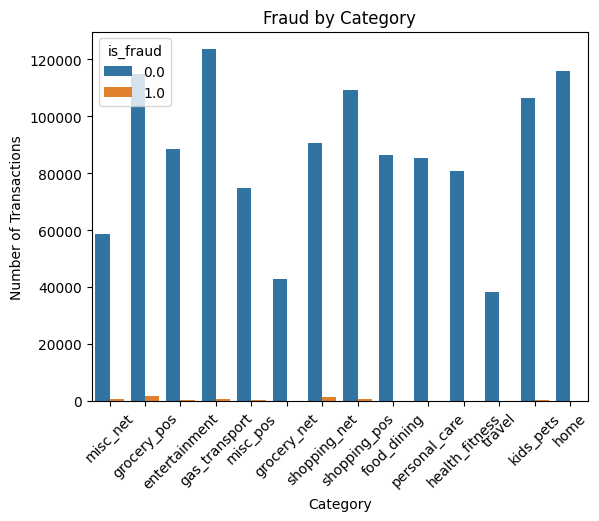

In [ ]:
groupby_cat=train_df.groupby(['category','is_fraud'])['is_fraud'].count()
print(groupby_cat)

sns.countplot(x='category',hue='is_fraud',data=train_df)
plt.xlabel("Category")
plt.ylabel('Number of Transactions')
plt.title('Fraud by Category')
plt.xticks(rotation=45)
plt.show()

#The most amount of fraud transactions occurred in the grocery_pos category followed by shopping_net
#Overall most amount of transactions occurred in the gas_transport category

gender  is_fraud
F       0.0         666232
        1.0           3527
M       0.0         550158
        1.0           3573
Name: is_fraud, dtype: int64


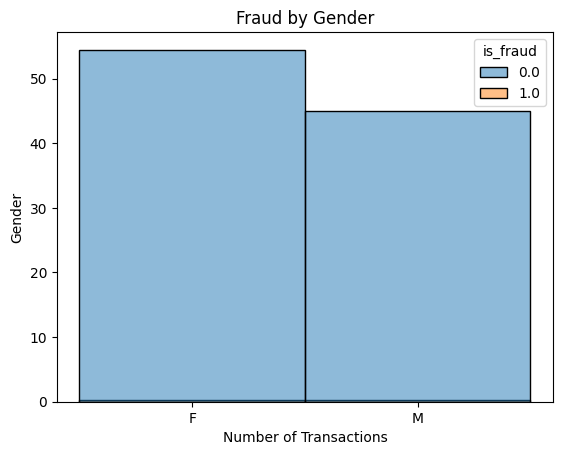

In [ ]:
groupby_gender=train_df.groupby(['gender','is_fraud'])['is_fraud'].count()
print(groupby_gender)

sns.histplot(x='gender',hue='is_fraud',stat='percent',data=train_df)
plt.xlabel('Number of Transactions')
plt.ylabel('Gender')
plt.title('Fraud by Gender')
plt.show()

#Females carried out an overall higher number of transactions and faced a higher number of fraud transactions as compared to males

In [ ]:
state_unique_count=train_df['state'].nunique()
print(state_unique_count)

51


In [ ]:
train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'])

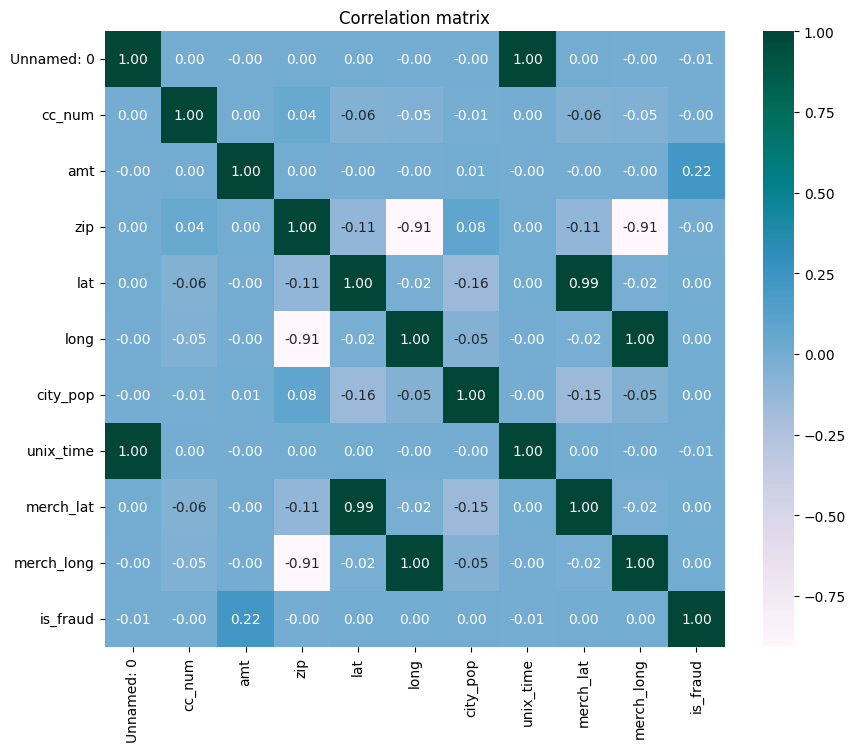

In [ ]:
numeric_df=train_df.select_dtypes(include=['int64','float64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation matrix')
plt.show()

#Transaction amount has a weak to moderate correlation with is_fraud

In [ ]:
#Dropping all unique columns

train_df.drop(columns=['cc_num','trans_num','trans_date_trans_time','unix_time'],inplace=True)
test_df.drop(columns=['cc_num','trans_num','trans_date_trans_time','unix_time'],inplace=True)

In [ ]:
train_df.head()

In [ ]:
#Next, let's encode some of the categorical variables such as merchant, category, names, gender, street, zip, city, state, job

from sklearn import preprocessing
l_e=preprocessing.LabelEncoder()

def labelEncode(col_name):
  train_df[col_name]=l_e.fit_transform(train_df[col_name])
  test_df[col_name]=l_e.fit_transform(test_df[col_name])

In [ ]:
ecols=['merchant','category','first','last','gender','street','city','state','zip','job']
for col in ecols:
  labelEncode(col)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_cols=['amt','lat','long','city_pop','merch_lat','merch_long']
for col in num_cols:
  train_df[col]=sc.fit_transform(pd.DataFrame(train_df[col]))
  test_df[col]=sc.transform(pd.DataFrame(test_df[col]))

In [ ]:
# TRAIN_TEST SPLIT

from sklearn.model_selection import train_test_split
columns=['merchant','category','amt','first','last','gender','street','city','state','zip','lat','long','city_pop','job','merch_lat','merch_long']
X=train_df[columns]
y=train_df['is_fraud']

train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
method=SMOTE()
train_X,train_y=method.fit_resample(train_X,train_y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
lr=LogisticRegression(max_iter=1000)
lr.fit(train_X,train_y)
y_pred=lr.predict(val_X)
accuracy=accuracy_score(val_y,y_pred)
print(accuracy)

print(classification_report(val_y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9936084584124784
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    304098
         1.0       0.00      0.00      0.00      1775

    accuracy                           0.99    305873
   macro avg       0.50      0.50      0.50    305873
weighted avg       0.99      0.99      0.99    305873



In [ ]:
# scores=cross_val_score(lr,X,y,cv=10)
# print(scores)
# print("accuracy=",scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_X,train_y)
y_pred2=rf.predict(val_X)
print(accuracy_score(val_y,y_pred2))
print(classification_report(val_y,y_pred2))

0.9974662686801384
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    304098
         1.0       0.88      0.66      0.75      1775

    accuracy                           1.00    305873
   macro avg       0.94      0.83      0.87    305873
weighted avg       1.00      1.00      1.00    305873



In [ ]:
#Running model on test_df

y_pred_test=rf.predict(test_df[columns])
y_actual=test_df['is_fraud']
print(accuracy_score(y_actual,y_pred_test))
print(classification_report(y_actual,y_pred_test))

0.997495136930715
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.50      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.75      0.80    555719
weighted avg       1.00      1.00      1.00    555719



Thus, the Random forest Classifier gives the best precision results and overall accuracy for the given problem